In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import os
import cv2

In [ ]:
from tensorflow.keras import models, layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB6, ResNet50V2

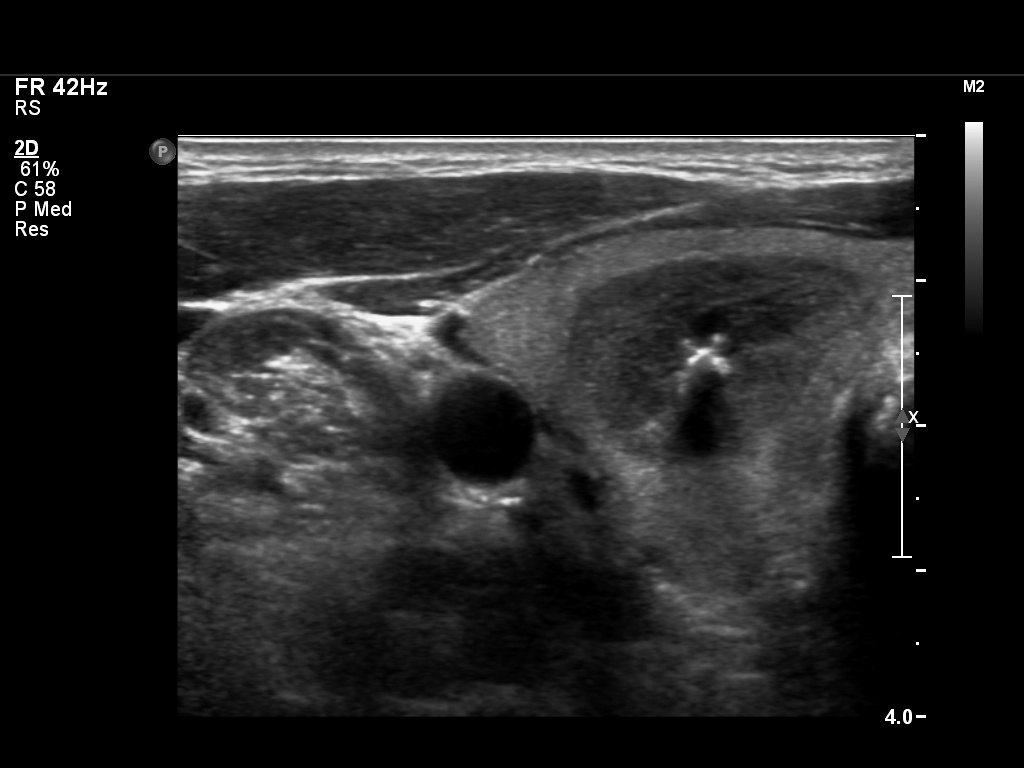

In [ ]:
Image = PIL.Image.open('../data/Benign/B_001-0002-1.0.jpg')
Image

In [ ]:
def read_image(im_name):
    image = cv2.imread(im_name)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
    return image_rgb

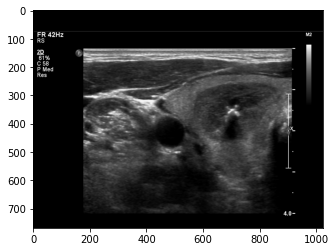

In [ ]:
im1=read_image('../data/Benign/B_001-0002-1.0.jpg')

In [ ]:
os.listdir('../data/Benign/')[:1]

['B_001-0002-1.0.jpg']

In [51]:
train_x = []
train_y = []
ImageSize = (224, 224)
for FileName in os.listdir('../data/Benign/'):
    train_x.append(cv2.imread('../data/Benign/' + FileName))
    train_y.append(0)
    
for FileName in os.listdir('../data/Cancer/'):
    train_x.append(cv2.imread('../data/Cancer/' + FileName))
    train_y.append(1)

KeyboardInterrupt: 

In [56]:
label_csv = pd.read_csv('../csv/label.csv')
label_csv

,FILENAME,x,y,width,height,RECENT
0,B_028-0120-1.3.jpg,479,308,248,224,85150
1,B_003-2017-1.1.jpg,341,381,394,333,85151
2,B_019-0025-1.0.jpg,492,272,204,190,85152
3,B_002-4194-1.5.jpg,636,318,157,157,85153
4,B_013-0124-2.1.jpg,393,307,214,193,85154
...,...,...,...,...,...,...
13156,M_002-4901-1.1.jpg,205,255,590,468,98306
13157,B_002-0555-1.2.jpg,206,170,309,307,98307
13158,B_002-5254-1.2.jpg,375,395,269,265,98308
13159,B_026-0011-2.0.jpg,387,321,105,108,98309


In [182]:

def img_crop(im,x,y,width,height,size = (224, 224)):
    im = im[y:y+height, x:x+width]
    im = cv2.resize(im,size)
    return im

In [178]:

def img_crop(im,x,y,width,height,size = (224, 224)):
    im = im[y-int(height/2):y+int(height/2), x-int(width/2):x+int(width/2),:]
    # im = cv2.resize(im,size)
    return im

In [159]:
x = label_csv[label_csv['FILENAME']=='B_003-2017-1.1.jpg']['x'].values[0]
y = label_csv[label_csv['FILENAME']=='B_003-2017-1.1.jpg']['y'].values[0]
width = label_csv[label_csv['FILENAME']=='B_003-2017-1.1.jpg']['width'].values[0]
height = label_csv[label_csv['FILENAME']=='B_003-2017-1.1.jpg']['height'].values[0]

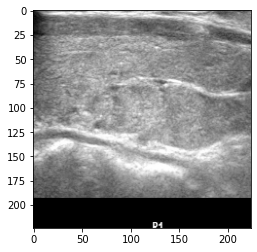

In [183]:
a = cv2.imread('../data/TRAIN/Benign/' + 'B_003-2017-1.1.jpg')
a = img_crop(a,x,y,width,height)
plt.imshow(a)
plt.show()

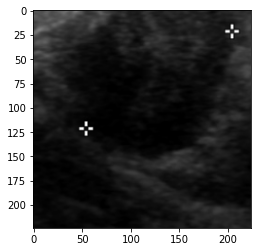

In [185]:
temp = 'M_001-0008-1.0.jpg'
x = label_csv[label_csv['FILENAME']==temp]['x'].values[0]
y = label_csv[label_csv['FILENAME']==temp]['y'].values[0]
width = label_csv[label_csv['FILENAME']==temp]['width'].values[0]
height = label_csv[label_csv['FILENAME']==temp]['height'].values[0]
a = cv2.imread('../data/TRAIN/Cancer/' + temp)
a = img_crop(a,x,y,width,height)
plt.imshow(a)
plt.show()

In [102]:
train_x_resize = list()
for img in os.listdir('../data/TRAIN/Benign/'):
    # temp = label_csv[label_csv['FILENAME']==img].iloc[0]
    try:
        temp = label_csv[label_csv['FILENAME']==img]['x'].values[0]
        im = cv2.imread('../data/TRAIN/Benign/' + img)
        train_x_resize.append(img_crop(img,temp['x'],temp['y'],temp['width'],temp['height']))
    except:
        pass
    # im = cv2.imread('../data/TRAIN/Benign/' + img)
    # train_x_resize.append(img_crop(img,temp['x'],temp['y'],temp['width'],temp['height']))


In [112]:
train_x_resize = np.array(train_x_resize)

In [113]:
train_x_resize.shape

(0,)

In [59]:
img_df = pd.DataFrame(os.listdir('../data/Benign/'))
img_df = img_df.append(os.listdir('../data/Cancer/'), ignore_index=True)
img_df

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '../data/Benign/'

In [52]:
label_csv['FILENAME'][0]

'B_028-0120-1.3.jpg'

In [ ]:
for FileName in os.listdir('../data/Benign/'):
    FileName.isinlabel_csv['FILENAME']

In [53]:
train_x[2].shape

(768, 1024, 3)

In [26]:
Train_x = np.stack(train_x, axis=0 )
Train_y = np.array(train_y)
print(Train_x.shape)
print(Train_y.shape)

ValueError: all input arrays must have the same shape

In [20]:
Train_x

array([None, None, None, ..., None, None, None], dtype=object)